In [140]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm

from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import OneHotEncoder

In [9]:
df = pd.read_csv('2018_and_on.csv')
df.columns = ['datetime','plaza_id','total_count']
df

,datetime,plaza_id,total_count
0,2020-09-05 00:00:00,Triboro Bronx,2314
1,2020-09-05 01:00:00,Triboro Bronx,1600
2,2020-09-05 02:00:00,Triboro Bronx,1151
3,2020-09-05 03:00:00,Triboro Bronx,983
4,2020-09-05 04:00:00,Triboro Bronx,1111
...,...,...,...
393728,2018-01-01 19:00:00,Verrazano,4668
393729,2018-01-01 20:00:00,Verrazano,4146
393730,2018-01-01 21:00:00,Verrazano,3056
393731,2018-01-01 22:00:00,Verrazano,2918


In [10]:
df['datetime'] = pd.to_datetime(df['datetime'])
df

,datetime,plaza_id,total_count
0,2020-09-05 00:00:00,Triboro Bronx,2314
1,2020-09-05 01:00:00,Triboro Bronx,1600
2,2020-09-05 02:00:00,Triboro Bronx,1151
3,2020-09-05 03:00:00,Triboro Bronx,983
4,2020-09-05 04:00:00,Triboro Bronx,1111
...,...,...,...
393728,2018-01-01 19:00:00,Verrazano,4668
393729,2018-01-01 20:00:00,Verrazano,4146
393730,2018-01-01 21:00:00,Verrazano,3056
393731,2018-01-01 22:00:00,Verrazano,2918


In [11]:
df.set_index('datetime', inplace=True)
df

,plaza_id,total_count
datetime,,
2020-09-05 00:00:00,Triboro Bronx,2314
2020-09-05 01:00:00,Triboro Bronx,1600
2020-09-05 02:00:00,Triboro Bronx,1151
2020-09-05 03:00:00,Triboro Bronx,983
2020-09-05 04:00:00,Triboro Bronx,1111
...,...,...
2018-01-01 19:00:00,Verrazano,4668
2018-01-01 20:00:00,Verrazano,4146
2018-01-01 21:00:00,Verrazano,3056


In [15]:
_df = df.groupby('plaza_id')['total_count'].resample('1D').sum()
_df

plaza_id          datetime  
Brooklyn Battery  2018-01-01     28500
                  2018-01-02     47160
                  2018-01-03     54005
                  2018-01-04     20484
                  2018-01-05     38007
                                 ...  
Whitestone        2020-09-01    120023
                  2020-09-02    121942
                  2020-09-03    129804
                  2020-09-04    142667
                  2020-09-05    132535
Name: total_count, Length: 9790, dtype: int64

In [20]:
_df_unstack = _df.unstack().T

In [25]:
_df_unstack

plaza_id,Brooklyn Battery,Cross Bay,Henry Hudson,Marine Parkway,Quessn Midtown,Throgs Neck,Triboro Bronx,Triboro Manhattan,Verrazano,Whitestone
datetime,,,,,,,,,,
2018-01-01,28500,13226,45681,11729,53427,96408,107518,29590,79469,106796
2018-01-02,47160,21875,60610,19887,67000,106264,129574,35356,95649,117211
2018-01-03,54005,24607,67983,22067,71725,115952,136213,38937,103506,123974
2018-01-04,20484,8303,14502,6167,26625,28406,50867,13270,37820,38114
2018-01-05,38007,16839,49850,13929,55153,80477,105945,29308,74375,91229
...,...,...,...,...,...,...,...,...,...,...
2020-09-01,54205,22050,58137,21816,66451,102514,123835,34637,98659,120023
2020-09-02,53388,21632,61046,21038,66285,100477,121336,34427,99886,121942
2020-09-03,58136,25051,66150,25955,69008,109383,132064,38136,103172,129804


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000139927C8>,
      dtype=object)

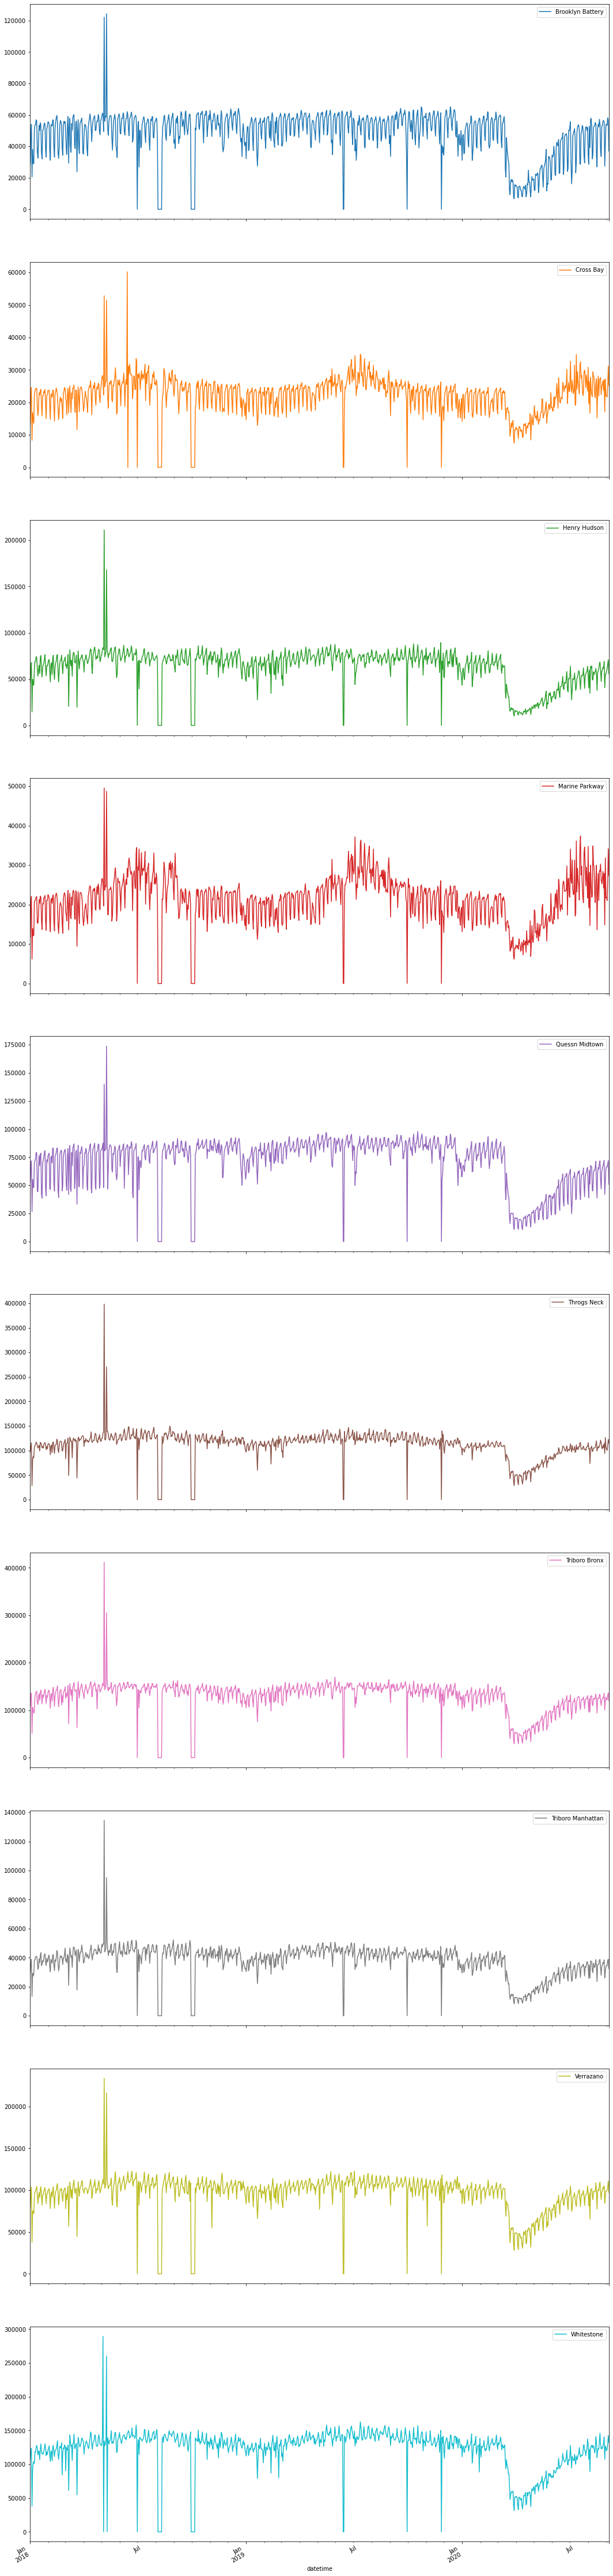

In [33]:
_df_unstack.plot(subplots=True, figsize=(18,90))

In [34]:
_df_unstack.describe()

plaza_id,Brooklyn Battery,Cross Bay,Henry Hudson,Marine Parkway,Quessn Midtown,Throgs Neck,Triboro Bronx,Triboro Manhattan,Verrazano,Whitestone
count,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000
mean,48167.472932,22295.709908,63432.754852,21252.890705,71258.582227,112031.234934,129281.126660,38040.430031,96525.988764,123015.129724
std,14608.810137,5793.045759,19939.520241,6230.511205,22220.615961,27542.396207,33063.541036,10730.967999,21863.446873,30157.491419
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42719.500000,19430.500000,58111.500000,17438.000000,63813.000000,107806.500000,123306.000000,34971.000000,93759.000000,120408.000000
50%,53327.000000,23501.000000,69728.000000,22148.000000,80189.000000,118016.000000,139089.000000,41003.000000,102324.000000,131048.000000
75%,58005.500000,25433.000000,75322.000000,24668.000000,85456.000000,125179.000000,147613.500000,44149.500000,107856.500000,139184.500000
max,124290.000000,60196.000000,211128.000000,49536.000000,173820.000000,398139.000000,411801.000000,134658.000000,233739.000000,289376.000000


C:\Users\albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


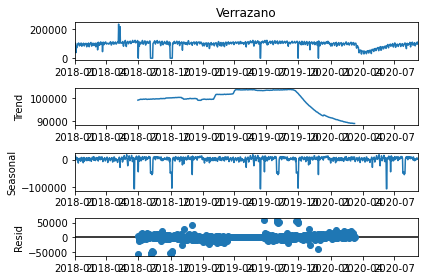

In [42]:
decomposed_df_verrazno = sm.tsa.seasonal_decompose(_df_unstack['Verrazano'], freq= 360)

figure = decomposed_df_verrazno.plot()


In [43]:
_df_unstack.columns

Index(['Brooklyn Battery', 'Cross Bay', 'Henry Hudson', 'Marine Parkway',
       'Quessn Midtown', 'Throgs Neck', 'Triboro Bronx', 'Triboro Manhattan',
       'Verrazano', 'Whitestone'],
      dtype='object', name='plaza_id')

In [44]:
_df_unstack['Brooklyn Battery'].diff().iloc[1:]

datetime
2018-01-02    18660.0
2018-01-03     6845.0
2018-01-04   -33521.0
2018-01-05    17523.0
2018-01-06    -8693.0
               ...   
2020-09-01      553.0
2020-09-02     -817.0
2020-09-03     4748.0
2020-09-04    -1856.0
2020-09-05   -19309.0
Freq: D, Name: Brooklyn Battery, Length: 978, dtype: float64

In [45]:
train_sample = pd.concat([_df_unstack['Brooklyn Battery'].diff().iloc[1:], 
                         _df_unstack['Cross Bay'].diff().iloc[1:], 
                         _df_unstack['Henry Hudson'].diff().iloc[1:], 
                         _df_unstack['Marine Parkway'].diff().iloc[1:], 
                         _df_unstack['Quessn Midtown'].diff().iloc[1:], 
                         _df_unstack['Throgs Neck'].diff().iloc[1:], 
                         _df_unstack['Triboro Bronx'].diff().iloc[1:], 
                         _df_unstack['Triboro Manhattan'].diff().iloc[1:], 
                         _df_unstack['Verrazano'].diff().iloc[1:],
                         _df_unstack['Whitestone'].diff().iloc[1:]], axis = 1)
model = sm.tsa.VARMAX(train_sample, order = (2,1), trend = 'c')
result = model.fit(maxiter=1000, disp=False)
result.summary()

C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


KeyboardInterrupt: 

In [46]:
_df_unstack

plaza_id,Brooklyn Battery,Cross Bay,Henry Hudson,Marine Parkway,Quessn Midtown,Throgs Neck,Triboro Bronx,Triboro Manhattan,Verrazano,Whitestone
datetime,,,,,,,,,,
2018-01-01,28500,13226,45681,11729,53427,96408,107518,29590,79469,106796
2018-01-02,47160,21875,60610,19887,67000,106264,129574,35356,95649,117211
2018-01-03,54005,24607,67983,22067,71725,115952,136213,38937,103506,123974
2018-01-04,20484,8303,14502,6167,26625,28406,50867,13270,37820,38114
2018-01-05,38007,16839,49850,13929,55153,80477,105945,29308,74375,91229
...,...,...,...,...,...,...,...,...,...,...
2020-09-01,54205,22050,58137,21816,66451,102514,123835,34637,98659,120023
2020-09-02,53388,21632,61046,21038,66285,100477,121336,34427,99886,121942
2020-09-03,58136,25051,66150,25955,69008,109383,132064,38136,103172,129804


In [60]:
for i in _df_unstack.columns:
    _df_unstack[i] = _df_unstack[i].replace(to_replace=0, method='ffill')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000019857C08>,
      dtype=object)

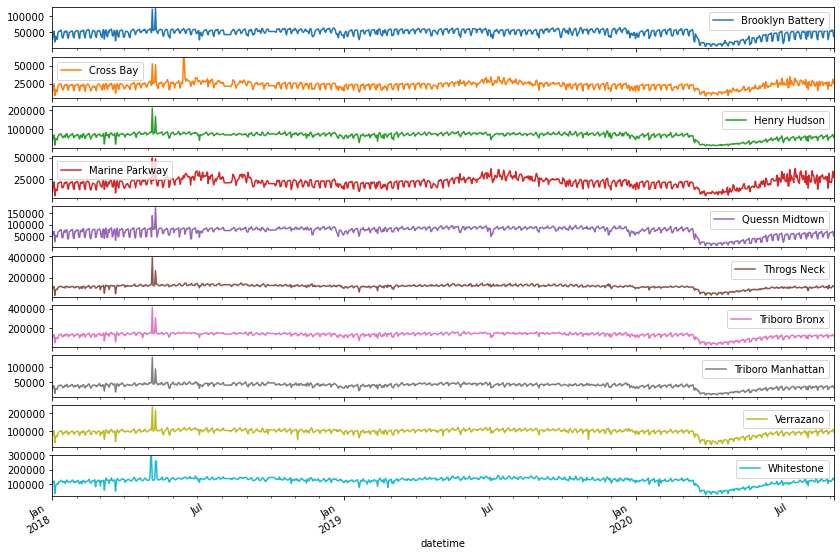

In [61]:
_df_unstack.plot(subplots=True, figsize=(14,10))

In [112]:
_BBT = _df_unstack[['Brooklyn Battery']].copy()

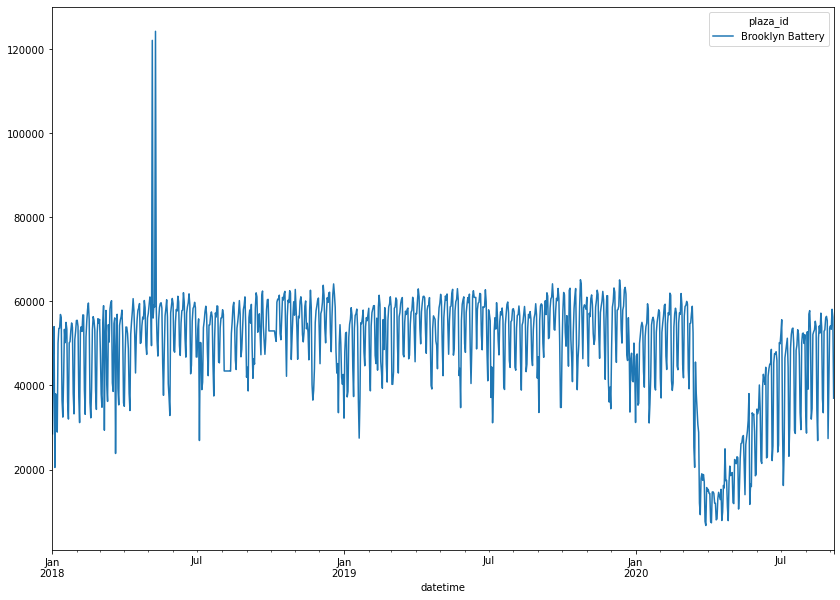

In [98]:
_BBT.plot(figsize=(14,10))

In [99]:
_BBT['2018':'2019']

plaza_id,Brooklyn Battery
datetime,
2018-01-01,28500
2018-01-02,47160
2018-01-03,54005
2018-01-04,20484
2018-01-05,38007
...,...
2019-12-27,47674
2019-12-28,41165
2019-12-29,40876


In [100]:
tr_start,tr_end = '2018-01-01','2020-08-20'
te_start,te_end = '2020-08-21','2020-09-05'
tra = _BBT[tr_start:tr_end].dropna()
tes = _BBT[te_start:te_end].dropna()
# exog_train = _albert_daily_features.drop(columns = ['y', 'count_shifted_7', 'count_shifted_28'])[tr_start:tr_end].dropna()
# exog_test = _albert_daily_features.drop(columns = ['y', 'count_shifted_7', 'count_shifted_28'],axis = 1)[te_start:te_end].dropna()

In [76]:
stepwise_fit = auto_arima(_BBT, start_p=0, start_q=0, 
#                           exogenous = _albert_daily_features.drop(columns = ['y', 'count_shifted_7', 'count_shifted_28'])[tr_start:te_end].dropna(), 
                          information_criterion='oob',
                         max_p=3, max_q=3, m=12, out_of_sample_size=39,
                         seasonal=True,
                         d=None, trace=True,
                         error_action='ignore',   
                         suppress_warnings=True,  
                         stepwise=True)           

stepwise_fit.summary()

Performing stepwise search to minimize oob
Fit ARIMA: (0, 1, 0)x(1, 0, 1, 12) (constant=True); AIC=20609.587, BIC=20629.129, Time=1.162 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 12) (constant=True); AIC=20684.857, BIC=20694.628, Time=0.068 seconds
Fit ARIMA: (1, 1, 0)x(1, 0, 0, 12) (constant=True); AIC=20603.909, BIC=20623.451, Time=0.799 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 1, 12) (constant=True); AIC=20493.865, BIC=20513.407, Time=1.476 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 12) (constant=False); AIC=20682.881, BIC=20687.766, Time=0.050 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 12) (constant=True); AIC=20579.680, BIC=20594.336, Time=0.195 seconds
Fit ARIMA: (0, 1, 1)x(1, 0, 1, 12) (constant=True); AIC=20490.973, BIC=20515.400, Time=2.068 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 2, 12) (constant=True); AIC=20479.258, BIC=20503.686, Time=5.044 seconds
Fit ARIMA: (0, 1, 1)x(1, 0, 0, 12) (constant=True); AIC=20535.010, BIC=20554.552, Time=1.010 seconds
Fit ARIMA: (0, 1, 1)x(1, 0, 2, 12) (constant=Tr

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  979
Model:             SARIMAX(2, 1, 2)x(0, 0, 2, 12)   Log Likelihood              -10120.342
Date:                            Wed, 16 Sep 2020   AIC                          20256.683
Time:                                    14:52:58   BIC                          20295.767
Sample:                                         0   HQIC                         20271.554
                                            - 979                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.4992     31.154      1.268      0.205     -21.562     100.561
ar.L1          1.0219      0.048     21.468      0.000       0.929       1.115
ar.L2         -0.5986      0.025    -23.544      0.000      -0.648      -0.549
ma.L1         -1.4563      0.049    -29.863      0.000      -1.552      -1.361
ma.L2          0.6187      0.047     13.255      0.000       0.527       0.710
ma.S.L12      -0.2268      0.025     -9.037      0.000      -0.276      -0.178
ma.S.L24       0.0306      0.040      0.769      0.442      -0.047       0.108
sigma2      5.279e+07   2.27e-05   2.32e+12      0.000    5.28e+07    5.28e+07
===================================================================================
Ljung-Box (Q):                      591.36   Jarque-Bera (JB):              8229.26
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.69e+28. Standard errors may be unstable.
"""

In [101]:
model_SARIMAX = SARIMAX(tra,order=(2,1,2), seasonal_order = (0,0,2,12), freq='D', enforce_stationarity=False, enforce_invertibility=False)
results = model_SARIMAX.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   Brooklyn Battery   No. Observations:                  963
Model:             SARIMAX(2, 1, 2)x(0, 0, 2, 12)   Log Likelihood               -9714.544
Date:                            Wed, 16 Sep 2020   AIC                          19443.089
Time:                                    15:01:16   BIC                          19476.972
Sample:                                01-01-2018   HQIC                         19456.009
                                     - 08-20-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5720      0.040    -14.383      0.000      -0.650      -0.494
ar.L2          0.3761      0.036     10.556      0.000       0.306       0.446
ma.L1          0.1973      0.019     10.571      0.000       0.161       0.234
ma.L2         -0.9370      0.028    -33.717      0.000      -0.991      -0.883
ma.S.L12      -0.2665      0.028     -9.402      0.000      -0.322      -0.211
ma.S.L24      -0.0848      0.032     -2.611      0.009      -0.148      -0.021
sigma2      5.311e+07   4.89e-10   1.09e+17      0.000    5.31e+07    5.31e+07
===================================================================================
Ljung-Box (Q):                     1273.75   Jarque-Bera (JB):              4312.90
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                             0.69
Prob(H) (two-sided):                  0.02   Kurtosis:                        13.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.02e+32. Standard errors may be unstable.
"""

ARIMA model MSE:8893.91692122099


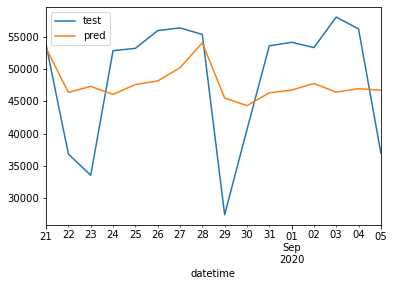

In [107]:

pred = results.predict(te_start,te_end)
print('ARIMA model MSE:{}'.format(np.sqrt(mean_squared_error(tes['Brooklyn Battery'],pred))))
pd.DataFrame({'test':tes['Brooklyn Battery'],'pred':pred}).plot();plt.show()

ARIMA model MSE:8060.447776315925


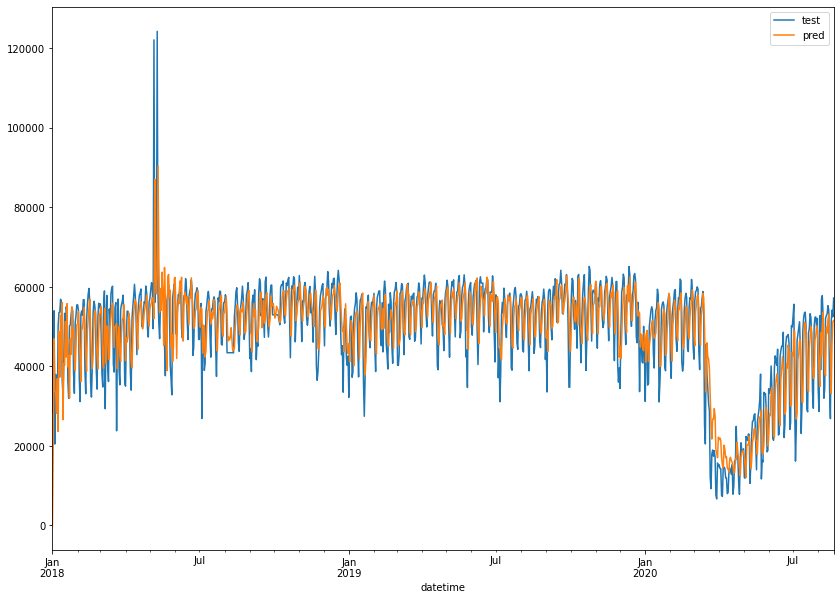

In [109]:
from sklearn.metrics import mean_squared_error
pred = results.predict(tr_start,tr_end)
print('ARIMA model MSE:{}'.format(np.sqrt(mean_squared_error(tra['Brooklyn Battery'],pred))))
pd.DataFrame({'test':tra['Brooklyn Battery'],'pred':pred}).plot(figsize=(14,10));plt.show()

In [110]:
_BBT

plaza_id,Brooklyn Battery
datetime,
2018-01-01,28500
2018-01-02,47160
2018-01-03,54005
2018-01-04,20484
2018-01-05,38007
...,...
2020-09-01,54205
2020-09-02,53388
2020-09-03,58136


In [137]:
_BBT = _df_unstack[['Brooklyn Battery']].copy()

In [138]:
_BBT['month'] = _BBT.index.month
_BBT['dayofweek'] = _BBT.index.weekday
_BBT['weekend'] = (_BBT.index.dayofweek>4).astype(int)
_BBT

plaza_id,Brooklyn Battery,month,dayofweek,weekend
datetime,,,,
2018-01-01,28500,1,0,0
2018-01-02,47160,1,1,0
2018-01-03,54005,1,2,0
2018-01-04,20484,1,3,0
2018-01-05,38007,1,4,0
...,...,...,...,...
2020-09-01,54205,9,1,0
2020-09-02,53388,9,2,0
2020-09-03,58136,9,3,0


In [114]:
# month_dummies = pd.get_dummies(_BBT['month'])
# month_dummies.columns = ['month-' + str(m) for m in range(1,13)]
# # month_dummies
# week_dummies = pd.get_dummies(_BBT['dayofweek'])
# week_dummies.columns = ['dayofweek-' + str(w) for w in range(0,7)]
# # week_dummies
# _BBT = pd.concat([_BBT, month_dummies, week_dummies], axis=1).drop(columns = ['month', 'dayofweek'])

In [115]:
_BBT

,Brooklyn Battery,weekend,month-1,month-2,month-3,month-4,month-5,month-6,month-7,month-8,...,month-10,month-11,month-12,dayofweek-0,dayofweek-1,dayofweek-2,dayofweek-3,dayofweek-4,dayofweek-5,dayofweek-6
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-01,28500,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2018-01-02,47160,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2018-01-03,54005,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2018-01-04,20484,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2018-01-05,38007,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,54205,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2020-09-02,53388,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2020-09-03,58136,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [134]:
pd.set_option('display.max_rows', 100)
_BBT['2020-03':].head(100)

,Brooklyn Battery,weekend,month-1,month-2,month-3,month-4,month-5,month-6,month-7,month-8,...,month-10,month-11,month-12,dayofweek-0,dayofweek-1,dayofweek-2,dayofweek-3,dayofweek-4,dayofweek-5,dayofweek-6
datetime,,,,,,,,,,,,,,,,,,,,,
2020-03-01,41835,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-03-02,56532,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2020-03-03,58810,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2020-03-04,59073,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2020-03-05,60015,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-03-06,59403,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2020-03-07,43890,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2020-03-08,39207,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-03-09,54748,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [139]:
conditions = [
    (_BBT.index >= '2020-03-21') & (_BBT.index < '2020-06-08'),
    (_BBT.index >= '2020-06-08') & (_BBT.index < '2020-06-22'),
    (_BBT.index >= '2020-06-22') & (_BBT.index < '2020-07-06'),
    (_BBT.index >= '2020-07-06') & (_BBT.index < '2020-07-19'),
    (_BBT.index >= '2020-07-19')
]

choices = [
    0,
    1,
    2,
    3,
    4
]

_BBT['Phase'] = np.select(conditions, choices, 5)
_BBT


plaza_id,Brooklyn Battery,month,dayofweek,weekend,Phase
datetime,,,,,
2018-01-01,28500,1,0,0,5
2018-01-02,47160,1,1,0,5
2018-01-03,54005,1,2,0,5
2018-01-04,20484,1,3,0,5
2018-01-05,38007,1,4,0,5
...,...,...,...,...,...
2020-09-01,54205,9,1,0,4
2020-09-02,53388,9,2,0,4
2020-09-03,58136,9,3,0,4


In [143]:
ohe = OneHotEncoder(drop='first')
categorical_columns = ['month', 'dayofweek','weekend','Phase']
_BBT_ohe = ohe.fit_transform(_BBT[categorical_columns]).toarray()
_BBT_ohe_df = pd.DataFrame(data = _BBT_ohe,
                           index = _BBT.index,
                          columns = ohe.get_feature_names(categorical_columns))

_BBT_merged = _BBT[['Brooklyn Battery']].merge(_BBT_ohe_df, left_index=True, right_index=True)
_BBT_merged

,Brooklyn Battery,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,...,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,weekend_1,Phase_1,Phase_2,Phase_3,Phase_4,Phase_5
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-01,28500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018-01-02,47160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018-01-03,54005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018-01-04,20484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018-01-05,38007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,54205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-09-02,53388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-09-03,58136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [145]:
tr_start,tr_end = '2018-01-01','2020-08-20'
te_start,te_end = '2020-08-21','2020-09-05'
tra = _BBT_merged[tr_start:tr_end].dropna()
tes = _BBT_merged[te_start:te_end].dropna()
exog_train = _BBT_merged.drop(columns = ['Brooklyn Battery'])[tr_start:tr_end].dropna()
exog_test = _BBT_merged.drop(columns = ['Brooklyn Battery'])[te_start:te_end].dropna()

In [146]:
stepwise_fit = auto_arima(_BBT_merged['Brooklyn Battery'], start_p=0, start_q=0, 
                          exogenous = _BBT_merged.drop(columns = ['Brooklyn Battery']).dropna(), 
                          information_criterion='oob',
                         max_p=3, max_q=3, m=12, out_of_sample_size=39,
                         seasonal=True,
                         d=None, trace=True,
                         error_action='ignore',   
                         suppress_warnings=True,  
                         stepwise=True)           

stepwise_fit.summary()

Performing stepwise search to minimize oob
Fit ARIMA: (0, 0, 0)x(1, 0, 1, 12) (constant=True); AIC=20117.167, BIC=20249.103, Time=9.914 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 12) (constant=True); AIC=20113.351, BIC=20235.514, Time=0.378 seconds
Fit ARIMA: (1, 0, 0)x(1, 0, 0, 12) (constant=True); AIC=19943.797, BIC=20075.734, Time=4.615 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 1, 12) (constant=True); AIC=19983.852, BIC=20115.788, Time=4.428 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 12) (constant=False); AIC=25849.733, BIC=25967.009, Time=0.368 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 12) (constant=True); AIC=19942.778, BIC=20069.827, Time=1.005 seconds
Fit ARIMA: (1, 0, 0)x(2, 0, 0, 12) (constant=True); AIC=19945.508, BIC=20082.331, Time=20.315 seconds
Fit ARIMA: (1, 0, 0)x(1, 0, 1, 12) (constant=True); AIC=19944.745, BIC=20081.568, Time=8.934 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 1, 12) (constant=True); AIC=19943.823, BIC=20075.759, Time=4.053 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 2, 12) (constant=T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  979
Model:             SARIMAX(2, 0, 1)x(1, 0, [], 12)   Log Likelihood               -9937.291
Date:                             Wed, 16 Sep 2020   AIC                          19932.581
Time:                                     15:56:14   BIC                          20074.291
Sample:                                          0   HQIC                         19986.496
                                             - 979                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    197.1689    367.690      0.536      0.592    -523.490     917.828
x1          7576.6463   2013.585      3.763      0.000    3630.091    1.15e+04
x2          6971.8237   1684.579      4.139      0.000    3670.109    1.03e+04
x3          1.038e+04   2345.747      4.427      0.000    5786.522     1.5e+04
x4          1.546e+04   1542.928     10.022      0.000    1.24e+04    1.85e+04
x5          1.401e+04   2135.025      6.560      0.000    9821.565    1.82e+04
x6          7767.1024   1839.711      4.222      0.000    4161.335    1.14e+04
x7          8181.0565   2637.941      3.101      0.002    3010.787    1.34e+04
x8          1.073e+04   2055.359      5.219      0.000    6698.823    1.48e+04
x9          1.135e+04   2436.895      4.657      0.000    6573.280    1.61e+04
x10         1.049e+04   2123.471      4.941      0.000    6329.923    1.47e+04
x11         9854.0911   1888.855      5.217      0.000    6152.003    1.36e+04
x12         6050.4410    773.933      7.818      0.000    4533.560    7567.322
x13         6496.5432    793.301      8.189      0.000    4941.703    8051.384
x14         8765.8631    716.047     12.242      0.000    7362.436    1.02e+04
x15         7024.0407    851.452      8.249      0.000    5355.226    8692.855
x16         -804.0554    455.564     -1.765      0.078   -1696.944      88.833
x17        -2832.5308    351.812     -8.051      0.000   -3522.070   -2142.991
x18        -3636.5861    389.584     -9.335      0.000   -4400.157   -2873.015
x19         2.112e+04   3821.360      5.527      0.000    1.36e+04    2.86e+04
x20         2.594e+04   2970.109      8.735      0.000    2.01e+04    3.18e+04
x21         3.372e+04   3663.643      9.203      0.000    2.65e+04    4.09e+04
x22           3.5e+04   2995.656     11.683      0.000    2.91e+04    4.09e+04
x23         4.119e+04   1445.967     28.489      0.000    3.84e+04     4.4e+04
ar.L1          0.9532      0.161      5.934      0.000       0.638       1.268
ar.L2         -0.1332      0.079     -1.679      0.093      -0.289       0.022
ma.L1         -0.6057      0.160     -3.797      0.000      -0.918      -0.293
ar.S.L12      -0.0510      0.054     -0.941      0.347      -0.157       0.055
sigma2       3.75e+07      2.496    1.5e+07      0.000    3.75e+07    3.75e+07
===================================================================================
Ljung-Box (Q):                       94.99   Jarque-Bera (JB):             38604.91
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                             1.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-st

In [147]:
model_SARIMAX = SARIMAX(tra['Brooklyn Battery'],order=(2,0,1),seasonal_order=(1,0,0,12), exog = exog_train, freq='D', enforce_stationarity=False, enforce_invertibility=False)
results = model_SARIMAX.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                    Brooklyn Battery   No. Observations:                  963
Model:             SARIMAX(2, 0, 1)x(1, 0, [], 12)   Log Likelihood               -9617.834
Date:                             Wed, 16 Sep 2020   AIC                          19291.667
Time:                                     15:56:48   BIC                          19427.619
Sample:                                 01-01-2018   HQIC                         19343.469
                                      - 08-20-2020                                         
Covariance Type:                               opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
month_2      7635.1791   2104.445      3.628      0.000    3510.544    1.18e+04
month_3      7041.8240   1698.359      4.146      0.000    3713.102    1.04e+04
month_4      1.046e+04   2385.576      4.386      0.000    5788.653    1.51e+04
month_5      1.554e+04   1471.733     10.562      0.000    1.27e+04    1.84e+04
month_6      1.407e+04   1986.085      7.085      0.000    1.02e+04     1.8e+04
month_7      7738.9063   1806.926      4.283      0.000    4197.397    1.13e+04
month_8      8324.5449   2800.904      2.972      0.003    2834.875    1.38e+04
month_9      1.079e+04   2158.658      4.998      0.000    6559.025     1.5e+04
month_10      1.14e+04   2638.653      4.321      0.000    6229.446    1.66e+04
month_11     1.055e+04   2349.031      4.491      0.000    5944.490    1.52e+04
month_12     9914.9690   2004.902      4.945      0.000    5985.433    1.38e+04
dayofweek_1  5880.7716    796.099      7.387      0.000    4320.446    7441.097
dayofweek_2  6460.6968    803.678      8.039      0.000    4885.517    8035.876
dayofweek_3  8699.7196    786.476     11.062      0.000    7158.254    1.02e+04
dayofweek_4  6932.0242    868.128      7.985      0.000    5230.524    8633.524
dayofweek_5  -883.5440    464.595     -1.902      0.057   -1794.133      27.045
dayofweek_6 -2945.4246    359.126     -8.202      0.000   -3649.298   -2241.551
weekend_1   -3828.9685    400.978     -9.549      0.000   -4614.871   -3043.066
Phase_1      2.119e+04   3973.262      5.333      0.000    1.34e+04     2.9e+04
Phase_2      2.605e+04   3167.766      8.222      0.000    1.98e+04    3.23e+04
Phase_3      3.387e+04   3875.845      8.738      0.000    2.63e+04    4.15e+04
Phase_4      3.588e+04   3387.489     10.593      0.000    2.92e+04    4.25e+04
Phase_5      4.127e+04   1151.564     35.840      0.000     3.9e+04    4.35e+04
ar.L1           1.1207      0.126      8.919      0.000       0.874       1.367
ar.L2          -0.2132      0.065     -3.290      0.001      -0.340      -0.086
ma.L1          -0.7602      0.124     -6.106      0.000      -1.004      -0.516
ar.S.L12       -0.0483      0.054     -0.896      0.370      -0.154       0.057
sigma2       3.755e+07      2.541   1.48e+07      0.000    3.76e+07    3.76e+07
===================================================================================
Ljung-Box (Q):                       90.47   Jarque-Bera (JB):             43652.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                             1.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-s

ARIMA model MSE:5208.834694661041


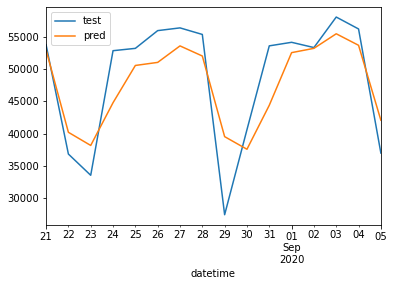

In [148]:

pred = results.predict(te_start,te_end, exog= exog_test)
print('ARIMA model MSE:{}'.format(np.sqrt(mean_squared_error(tes['Brooklyn Battery'],pred))))
pd.DataFrame({'test':tes['Brooklyn Battery'],'pred':pred}).plot();plt.show()

ARIMA model MSE:6192.459338586512


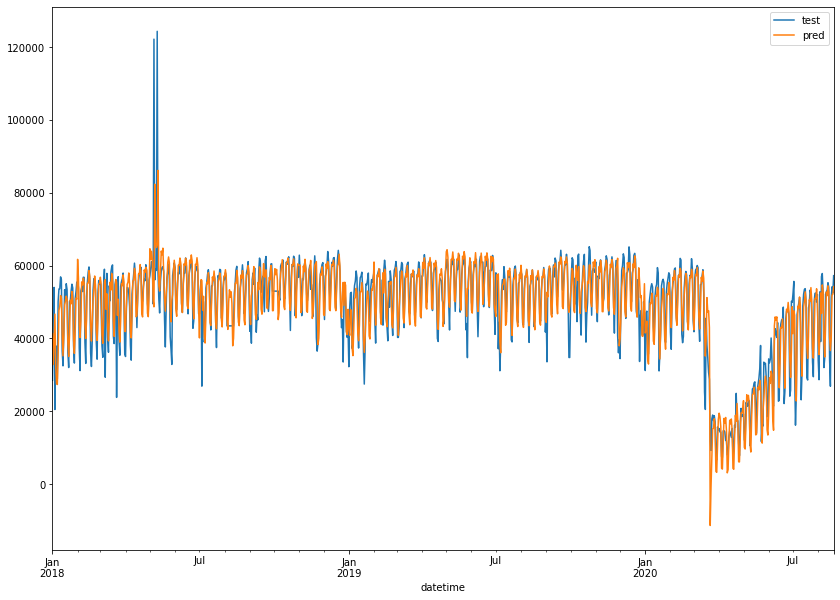

In [149]:
from sklearn.metrics import mean_squared_error
pred = results.predict(tr_start,tr_end, exog= exog_train)
print('ARIMA model MSE:{}'.format(np.sqrt(mean_squared_error(tra['Brooklyn Battery'],pred))))
pd.DataFrame({'test':tra['Brooklyn Battery'],'pred':pred}).plot(figsize=(14,10));plt.show()

ARIMA model MSE:5660.201246044165


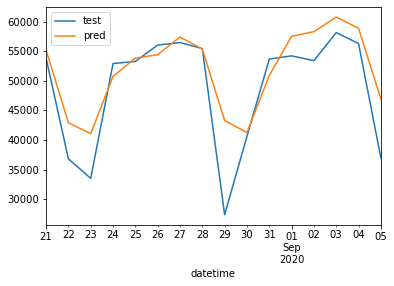

In [128]:

pred = results.predict(te_start,te_end, exog= exog_test)
print('ARIMA model MSE:{}'.format(np.sqrt(mean_squared_error(tes['Brooklyn Battery'],pred))))
pd.DataFrame({'test':tes['Brooklyn Battery'],'pred':pred}).plot();plt.show()

ARIMA model MSE:7214.93927236864


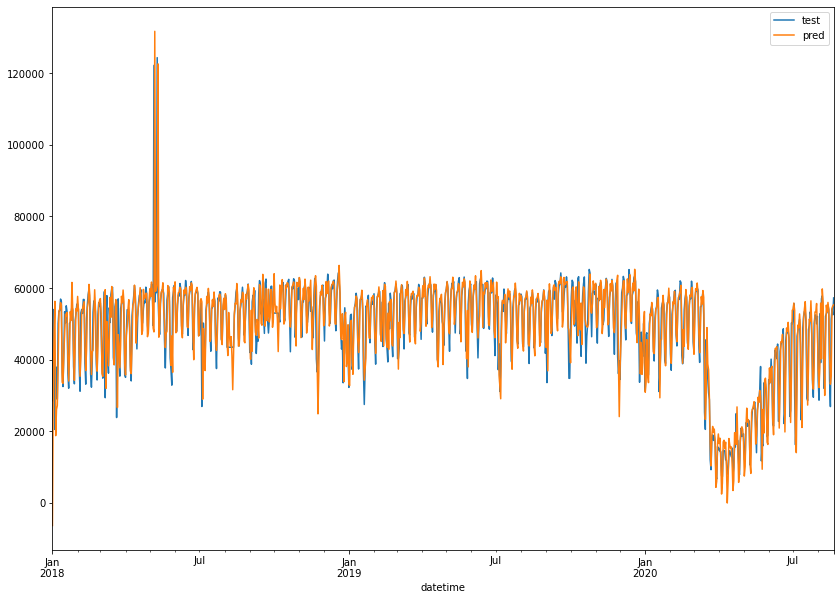

In [129]:
from sklearn.metrics import mean_squared_error
pred = results.predict(tr_start,tr_end, exog= exog_train)
print('ARIMA model MSE:{}'.format(np.sqrt(mean_squared_error(tra['Brooklyn Battery'],pred))))
pd.DataFrame({'test':tra['Brooklyn Battery'],'pred':pred}).plot(figsize=(14,10));plt.show()

In [159]:
model_SARIMAX = SARIMAX(tra['Brooklyn Battery'],order=(7,0,7),seasonal_order=(1,0,0,12), exog = exog_train, freq='D', enforce_stationarity=False, enforce_invertibility=False)
results = model_SARIMAX.fit()
results.summary()

C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                    Brooklyn Battery   No. Observations:                  963
Model:             SARIMAX(7, 0, 7)x(1, 0, [], 12)   Log Likelihood               -9534.771
Date:                             Wed, 16 Sep 2020   AIC                          19147.542
Time:                                     17:01:24   BIC                          19336.697
Sample:                                 01-01-2018   HQIC                         19219.635
                                      - 08-20-2020                                         
Covariance Type:                               opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
month_2      7635.1789   2147.267      3.556      0.000    3426.613    1.18e+04
month_3      7041.8240   1828.474      3.851      0.000    3458.080    1.06e+04
month_4      1.046e+04   2425.355      4.315      0.000    5710.688    1.52e+04
month_5      1.554e+04   1652.896      9.405      0.000    1.23e+04    1.88e+04
month_6      1.407e+04   1832.475      7.679      0.000    1.05e+04    1.77e+04
month_7      7738.9064   1833.518      4.221      0.000    4145.278    1.13e+04
month_8      8324.5449   2901.752      2.869      0.004    2637.216     1.4e+04
month_9      1.079e+04   2040.781      5.287      0.000    6790.058    1.48e+04
month_10      1.14e+04   2671.393      4.268      0.000    6165.278    1.66e+04
month_11     1.055e+04   2503.909      4.213      0.000    5640.934    1.55e+04
month_12     9914.9690   2064.732      4.802      0.000    5868.169     1.4e+04
dayofweek_1  5880.7704   1102.333      5.335      0.000    3720.237    8041.304
dayofweek_2  6460.6972   1290.985      5.004      0.000    3930.414    8990.981
dayofweek_3  8699.7196   1291.815      6.734      0.000    6167.809    1.12e+04
dayofweek_4  6932.0240   1451.250      4.777      0.000    4087.627    9776.421
dayofweek_5  -883.5435    746.761     -1.183      0.237   -2347.168     580.081
dayofweek_6 -2945.4257    554.393     -5.313      0.000   -4032.016   -1858.835
weekend_1   -3828.9692    673.855     -5.682      0.000   -5149.701   -2508.238
Phase_1      2.119e+04   3459.611      6.124      0.000    1.44e+04     2.8e+04
Phase_2      2.605e+04   3254.818      8.002      0.000    1.97e+04    3.24e+04
Phase_3      3.387e+04   5360.409      6.318      0.000    2.34e+04    4.44e+04
Phase_4      3.588e+04   3825.479      9.380      0.000    2.84e+04    4.34e+04
Phase_5      4.127e+04   1152.093     35.823      0.000     3.9e+04    4.35e+04
ar.L1           0.1676      0.140      1.199      0.230      -0.106       0.441
ar.L2          -0.4514      0.130     -3.471      0.001      -0.706      -0.196
ar.L3           0.2498      0.153      1.632      0.103      -0.050       0.550
ar.L4          -0.3497      0.120     -2.911      0.004      -0.585      -0.114
ar.L5          -0.0524      0.128     -0.409      0.682      -0.303       0.198
ar.L6          -0.0206      0.092     -0.224      0.823      -0.201       0.160
ar.L7           0.5028      0.073      6.923      0.000       0.360       0.645
ma.L1           0.2219      0.141      1.574      0.115      -0.054       0.498
ma.L2           0.5968      0.110      5.448      0.000       0.382       0.812
ma.L3          -0.0525      0.151     -0.347      0.729      -0.349       0.244
ma.L4           0.5474      0.119      4.602      0.000       0.314       0.781
ma.L5           0.1595      0.136      1.171      0.241      -0.107       0.426
ma.L6           0.3134      0.103      3.056      0.002       0.112       0.514
ma.L

ARIMA model MSE:4235.7572184631135


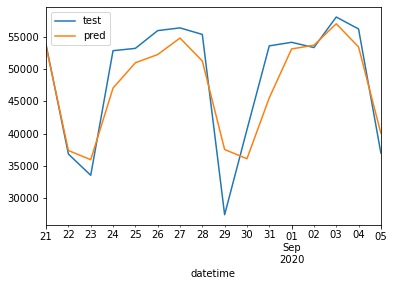

In [160]:

pred = results.predict(te_start,te_end, exog= exog_test)
print('ARIMA model MSE:{}'.format(np.sqrt(mean_squared_error(tes['Brooklyn Battery'],pred))))
pd.DataFrame({'test':tes['Brooklyn Battery'],'pred':pred}).plot();plt.show()

ARIMA model MSE:5990.379199394405


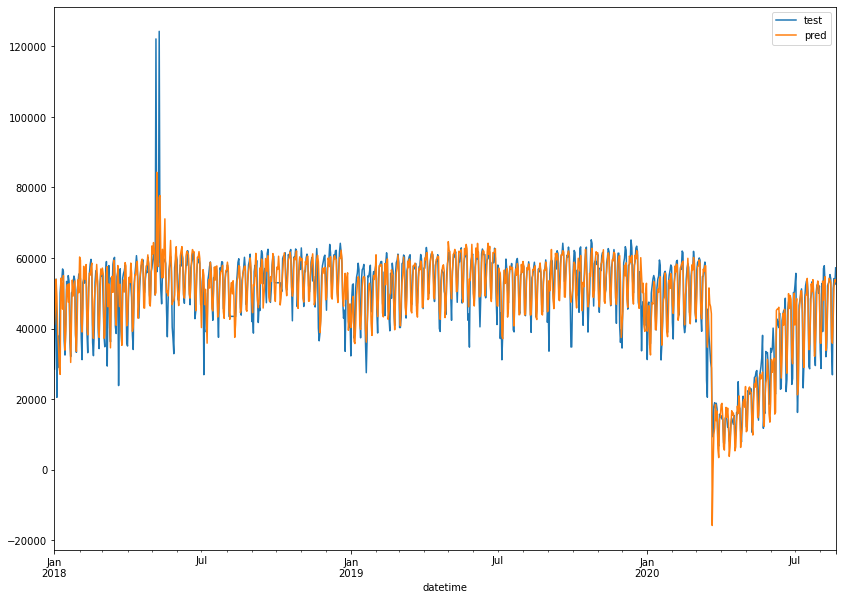

In [161]:
from sklearn.metrics import mean_squared_error
pred = results.predict(tr_start,tr_end, exog= exog_train)
print('ARIMA model MSE:{}'.format(np.sqrt(mean_squared_error(tra['Brooklyn Battery'],pred))))
pd.DataFrame({'test':tra['Brooklyn Battery'],'pred':pred}).plot(figsize=(14,10));plt.show()

In [156]:
stepwise_fit = auto_arima(_BBT_merged['Brooklyn Battery'], start_p=0, start_q=0, 
                          exogenous = _BBT_merged.drop(columns = ['Brooklyn Battery']).dropna(), 
                          information_criterion='oob',
                         max_p=8, max_q=8, m=12, out_of_sample_size=30,
                         seasonal=True,
                         d=None, trace=True,
                         error_action='ignore',   
                         suppress_warnings=True,  
                         stepwise=True)           

stepwise_fit.summary()

Performing stepwise search to minimize oob
Fit ARIMA: (0, 0, 0)x(1, 0, 1, 12) (constant=True); AIC=20116.595, BIC=20248.532, Time=7.810 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 12) (constant=True); AIC=20112.755, BIC=20234.918, Time=0.387 seconds
Fit ARIMA: (1, 0, 0)x(1, 0, 0, 12) (constant=True); AIC=19941.379, BIC=20073.315, Time=4.381 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 1, 12) (constant=True); AIC=19981.774, BIC=20113.710, Time=4.696 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 12) (constant=False); AIC=25858.147, BIC=25975.424, Time=0.374 seconds
Fit ARIMA: (0, 0, 0)x(1, 0, 0, 12) (constant=True); AIC=20114.523, BIC=20241.573, Time=2.551 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 1, 12) (constant=True); AIC=20114.515, BIC=20241.565, Time=2.821 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 12) (constant=True); AIC=19940.409, BIC=20067.458, Time=1.002 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 12) (constant=True); AIC=19979.912, BIC=20106.962, Time=0.962 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 12) (constant=Tr

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  979
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -9936.404
Date:                Wed, 16 Sep 2020   AIC                          19930.807
Time:                        16:25:52   BIC                          20072.517
Sample:                             0   HQIC                         19984.722
                                - 979                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    198.1048    421.548      0.470      0.638    -628.113    1024.323
x1          7599.5796   2054.170      3.700      0.000    3573.480    1.16e+04
x2          6999.7528   1756.616      3.985      0.000    3556.849    1.04e+04
x3          1.042e+04   2440.907      4.267      0.000    5632.192    1.52e+04
x4           1.55e+04   1641.668      9.439      0.000    1.23e+04    1.87e+04
x5          1.403e+04   2221.343      6.318      0.000    9680.878    1.84e+04
x6          7807.8352   1905.338      4.098      0.000    4073.441    1.15e+04
x7          8182.7533   2676.421      3.057      0.002    2937.065    1.34e+04
x8          1.075e+04   2120.052      5.071      0.000    6596.314    1.49e+04
x9          1.137e+04   2521.476      4.510      0.000    6428.706    1.63e+04
x10         1.051e+04   2212.081      4.753      0.000    6178.333    1.48e+04
x11         9878.6869   1940.647      5.090      0.000    6075.088    1.37e+04
x12         5919.7283    777.359      7.615      0.000    4396.132    7443.325
x13         6517.8342    787.121      8.281      0.000    4975.106    8060.563
x14         8741.7617    713.287     12.256      0.000    7343.745    1.01e+04
x15         6985.9778    855.060      8.170      0.000    5310.091    8661.864
x16         -825.3690    445.319     -1.853      0.064   -1698.178      47.440
x17        -2880.0135    361.740     -7.962      0.000   -3589.010   -2171.017
x18        -3705.3825    385.843     -9.603      0.000   -4461.621   -2949.143
x19         2.114e+04   3903.463      5.417      0.000    1.35e+04    2.88e+04
x20         2.596e+04   3095.242      8.388      0.000    1.99e+04     3.2e+04
x21         3.372e+04   3773.953      8.936      0.000    2.63e+04    4.11e+04
x22         3.522e+04   3108.675     11.331      0.000    2.91e+04    4.13e+04
x23         4.123e+04   1474.153     27.966      0.000    3.83e+04    4.41e+04
ar.L1          0.9059      0.234      3.864      0.000       0.446       1.365
ar.L2         -0.1598      0.087     -1.831      0.067      -0.331       0.011
ar.L3          0.0489      0.046      1.058      0.290      -0.042       0.140
ma.L1         -0.5473      0.238     -2.296      0.022      -1.014      -0.080
sigma2      3.766e+07      2.860   1.32e+07      0.000    3.77e+07    3.77e+07
===================================================================================
Ljung-Box (Q):                       97.69   Jarque-Bera (JB):             38341.51
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                             1.48
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.5e+22. Standard errors may be unstab

In [157]:
model_SARIMAX = SARIMAX(tra['Brooklyn Battery'],order=(3,0,1), exog = exog_train, freq='D', enforce_stationarity=False, enforce_invertibility=False)
results = model_SARIMAX.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Brooklyn Battery   No. Observations:                  963
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -9738.945
Date:                Wed, 16 Sep 2020   AIC                          19533.889
Time:                        16:28:05   BIC                          19670.163
Sample:                    01-01-2018   HQIC                         19585.785
                         - 08-20-2020                                         
Covariance Type:                  opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
month_2      7635.1790   2065.628      3.696      0.000    3586.623    1.17e+04
month_3      7041.8240   1664.102      4.232      0.000    3780.244    1.03e+04
month_4      1.046e+04   2362.893      4.429      0.000    5833.111    1.51e+04
month_5      1.554e+04   1502.115     10.349      0.000    1.26e+04    1.85e+04
month_6      1.407e+04   1951.413      7.211      0.000    1.02e+04    1.79e+04
month_7      7738.9065   1771.081      4.370      0.000    4267.651    1.12e+04
month_8      8324.5449   2748.580      3.029      0.002    2937.426    1.37e+04
month_9      1.079e+04   2123.106      5.082      0.000    6628.704     1.5e+04
month_10      1.14e+04   2591.747      4.399      0.000    6321.380    1.65e+04
month_11     1.055e+04   2371.566      4.448      0.000    5900.322    1.52e+04
month_12     9914.9691   1968.790      5.036      0.000    6056.211    1.38e+04
dayofweek_1  5880.7702    784.010      7.501      0.000    4344.140    7417.401
dayofweek_2  6460.6964    790.063      8.177      0.000    4912.202    8009.191
dayofweek_3  8699.7195    799.944     10.875      0.000    7131.858    1.03e+04
dayofweek_4  6932.0242    874.641      7.926      0.000    5217.759    8646.290
dayofweek_5  -883.5443    450.654     -1.961      0.050   -1766.809      -0.279
dayofweek_6 -2945.4260    360.500     -8.170      0.000   -3651.993   -2238.859
weekend_1   -3828.9702    386.315     -9.912      0.000   -4586.133   -3071.807
Phase_1      2.119e+04   3887.166      5.451      0.000    1.36e+04    2.88e+04
Phase_2      2.605e+04   3113.174      8.366      0.000    1.99e+04    3.21e+04
Phase_3      3.387e+04   3796.594      8.920      0.000    2.64e+04    4.13e+04
Phase_4      3.588e+04   3365.012     10.663      0.000    2.93e+04    4.25e+04
Phase_5      4.127e+04   1125.121     36.682      0.000    3.91e+04    4.35e+04
ar.L1           1.0799      0.084     12.854      0.000       0.915       1.245
ar.L2          -0.2136      0.046     -4.606      0.000      -0.305      -0.123
ar.L3           0.0180      0.037      0.485      0.628      -0.055       0.091
ma.L1          -0.7187      0.082     -8.714      0.000      -0.880      -0.557
sigma2       3.755e+07      2.434   1.54e+07      0.000    3.76e+07    3.76e+07
===================================================================================
Ljung-Box (Q):                       88.80   Jarque-Bera (JB):             40330.22
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                             1.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.41e+22. Standard errors may be unstable.
"""

ARIMA model MSE:5273.909921041971


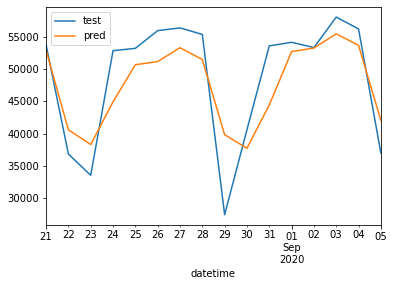

In [158]:

pred = results.predict(te_start,te_end, exog= exog_test)
print('ARIMA model MSE:{}'.format(np.sqrt(mean_squared_error(tes['Brooklyn Battery'],pred))))
pd.DataFrame({'test':tes['Brooklyn Battery'],'pred':pred}).plot();plt.show()

In [167]:
_df_unstack[tr_start:tr_end][_df_unstack.columns]

plaza_id,Brooklyn Battery,Cross Bay,Henry Hudson,Marine Parkway,Quessn Midtown,Throgs Neck,Triboro Bronx,Triboro Manhattan,Verrazano,Whitestone
datetime,,,,,,,,,,
2018-01-01,28500,13226,45681,11729,53427,96408,107518,29590,79469,106796
2018-01-02,47160,21875,60610,19887,67000,106264,129574,35356,95649,117211
2018-01-03,54005,24607,67983,22067,71725,115952,136213,38937,103506,123974
2018-01-04,20484,8303,14502,6167,26625,28406,50867,13270,37820,38114
2018-01-05,38007,16839,49850,13929,55153,80477,105945,29308,74375,91229
...,...,...,...,...,...,...,...,...,...,...
2020-08-16,26879,15202,37782,13619,38633,99398,93731,23597,77490,110050
2020-08-17,51279,23792,57126,23598,61322,104633,124727,35222,97862,120060
2020-08-18,54168,28077,58655,27903,65767,108104,125650,35351,101007,123407


In [165]:
exog_train

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,...,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,weekend_1,Phase_1,Phase_2,Phase_3,Phase_4,Phase_5
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-16,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2020-08-17,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-08-18,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [183]:
for i in exog_train.columns:
    exog_train[i] = exog_train[i].astype('float')

In [184]:
exog_train

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,...,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,weekend_1,Phase_1,Phase_2,Phase_3,Phase_4,Phase_5
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-16,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2020-08-17,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-08-18,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [188]:
for i in _df_unstack.columns:
    _df_unstack[i] = _df_unstack[i].astype('float')

In [193]:
_df_unstack[tr_start:tr_end][['Brooklyn Battery', 'Cross Bay']]

plaza_id,Brooklyn Battery,Cross Bay
datetime,,
2018-01-01,28500.0,13226.0
2018-01-02,47160.0,21875.0
2018-01-03,54005.0,24607.0
2018-01-04,20484.0,8303.0
2018-01-05,38007.0,16839.0
...,...,...
2020-08-16,26879.0,15202.0
2020-08-17,51279.0,23792.0
2020-08-18,54168.0,28077.0


In [186]:
exog_train.dtypes

month_2        float64
month_3        float64
month_4        float64
month_5        float64
month_6        float64
month_7        float64
month_8        float64
month_9        float64
month_10       float64
month_11       float64
month_12       float64
dayofweek_1    float64
dayofweek_2    float64
dayofweek_3    float64
dayofweek_4    float64
dayofweek_5    float64
dayofweek_6    float64
weekend_1      float64
Phase_1        float64
Phase_2        float64
Phase_3        float64
Phase_4        float64
Phase_5        float64
dtype: object

In [194]:
model_VARMAX = sm.tsa.VARMAX(_df_unstack[tr_start:tr_end][['Brooklyn Battery', 'Cross Bay']],
                             order=(2,0), trend = 'n',exog = exog_train, enforce_stationarity=False, enforce_invertibility=False)
results = model_VARMAX.fit(maxiter=1000, disp=True)
results.summary()

Dep. Variable:,"['Brooklyn Battery', 'Cross Bay']",No. Observations:,963
Model:,VARX(2),Log Likelihood,-18817.376
Date:,"Wed, 16 Sep 2020",AIC,37748.751
Time:,17:29:01,BIC,38026.344
Sample:,01-01-2018,HQIC,37854.449
,- 08-20-2020,,
Covariance Type:,opg,,
Ljung-Box (Q):,"363.73, 361.67",Jarque-Bera (JB):,"21107.39, 22942.78"
Prob(Q):,"0.00, 0.00",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"0.55, 0.83",Skew:,"1.17, 2.34"
Prob(H) (two-sided):,"0.00, 0.09",Kurtosis:,"25.82, 26.45"


In [195]:
pred = results.predict(te_start,te_end, exog= exog_test)
pred

,Brooklyn Battery,Cross Bay
2020-08-21,52031.585547,26585.460055
2020-08-22,44640.491148,25016.258564
2020-08-23,40944.291751,23263.018727
2020-08-24,43681.210924,22742.590327
2020-08-25,47840.920490,24226.582570
2020-08-26,49322.821875,24948.396889
2020-08-27,51231.775888,25643.653438
2020-08-28,51045.343682,26247.870182
2020-08-29,44490.960670,24846.563112
2020-08-30,40888.012276,23180.117178


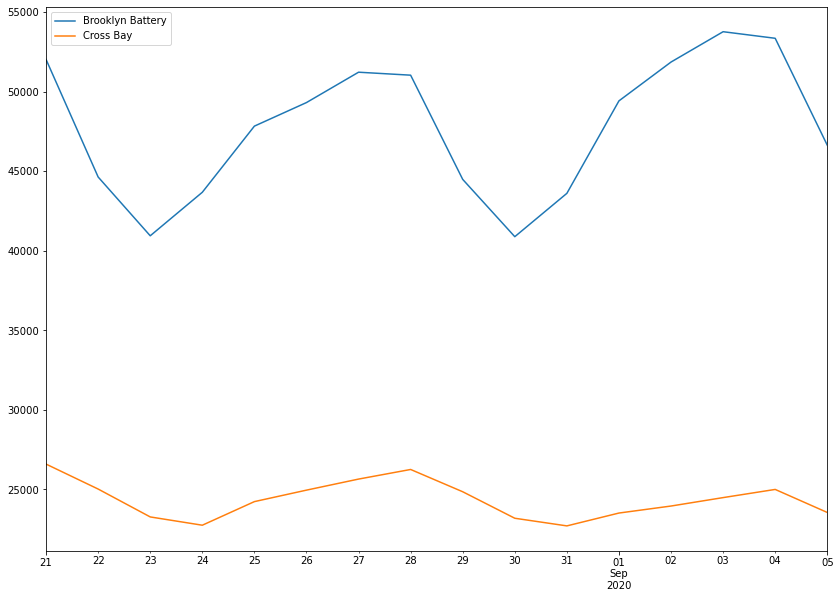

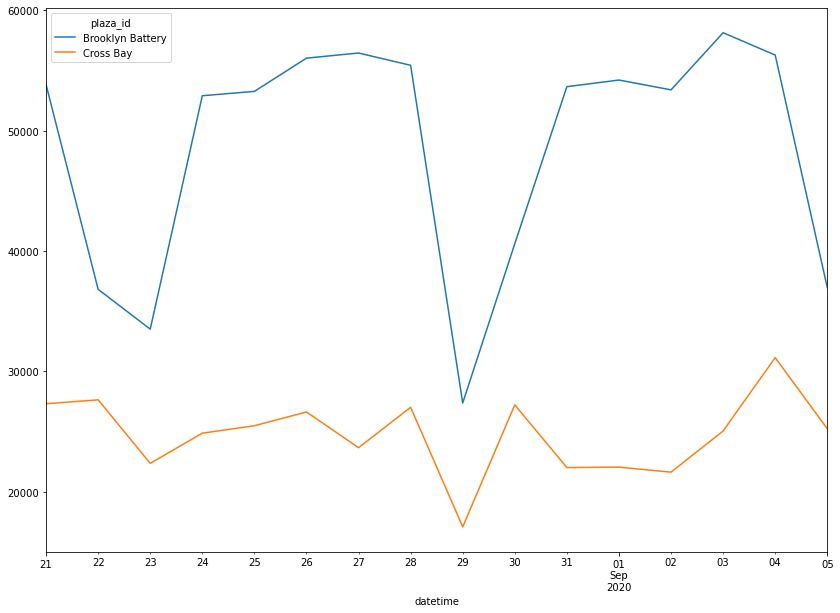

In [198]:
pred.plot(figsize=(14,10))
_df_unstack[te_start:te_end][['Brooklyn Battery', 'Cross Bay']].plot(figsize=(14,10))

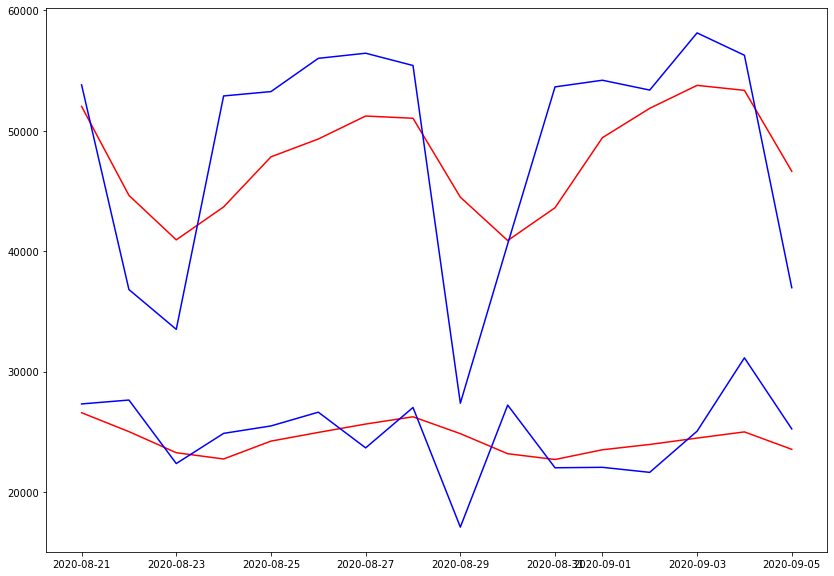

In [203]:
plt.figure(figsize=(14,10))
plt.plot(pred, color='red')
plt.plot(_df_unstack[te_start:te_end][['Brooklyn Battery', 'Cross Bay']], color='blue')

In [206]:
model_VARMAX = sm.tsa.VARMAX(_df_unstack[tr_start:tr_end][['Brooklyn Battery', 'Cross Bay']],
                             order=(1,1), trend = 'n',exog = exog_train, enforce_stationarity=False, enforce_invertibility=False)
results = model_VARMAX.fit(maxiter=1000, disp=True)
results.summary()

C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


Dep. Variable:,"['Brooklyn Battery', 'Cross Bay']",No. Observations:,963
Model:,"VARMAX(1,1)",Log Likelihood,-18816.637
Date:,"Wed, 16 Sep 2020",AIC,37747.273
Time:,17:39:47,BIC,38024.866
Sample:,01-01-2018,HQIC,37852.971
,- 08-20-2020,,
Covariance Type:,opg,,
Ljung-Box (Q):,"361.08, 349.62",Jarque-Bera (JB):,"20202.69, 23915.03"
Prob(Q):,"0.00, 0.00",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"0.59, 0.89",Skew:,"1.16, 2.44"
Prob(H) (two-sided):,"0.00, 0.30",Kurtosis:,"25.32, 26.92"


C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


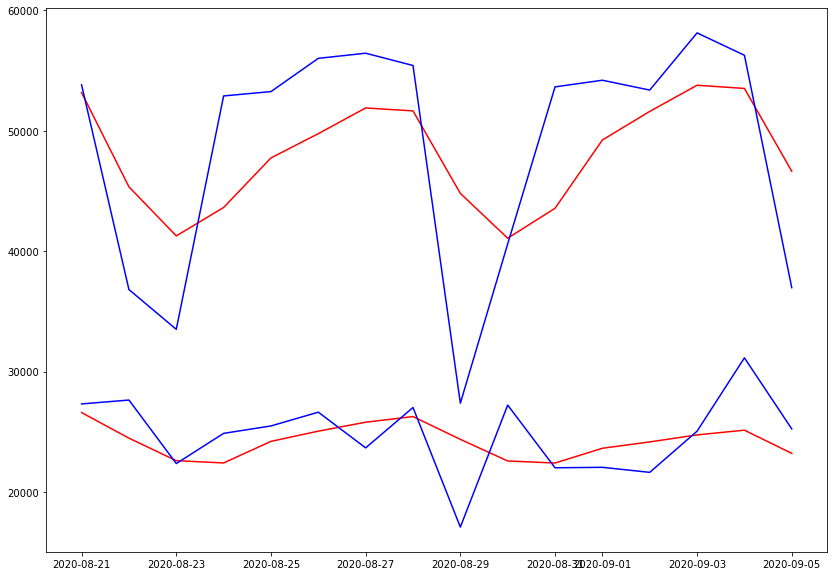

In [207]:
pred = results.predict(te_start,te_end, exog= exog_test)
plt.figure(figsize=(14,10))
plt.plot(pred, color='red')
plt.plot(_df_unstack[te_start:te_end][['Brooklyn Battery', 'Cross Bay']], color='blue')

In [208]:
pred

,Brooklyn Battery,Cross Bay
2020-08-21,53176.997788,26597.932046
2020-08-22,45350.966966,24471.624994
2020-08-23,41273.401428,22602.826600
2020-08-24,43633.501975,22412.115379
2020-08-25,47752.681496,24206.462859
2020-08-26,49767.264698,25054.514825
2020-08-27,51901.901921,25797.539693
2020-08-28,51657.429383,26265.793724
2020-08-29,44805.418428,24373.132228
2020-08-30,41082.099140,22577.068302


In [211]:
for i in pred.columns:
    print('rmse value ', i, ' is', np.sqrt(mean_squared_error(pred[i],_df_unstack[te_start:te_end][i])))

rmse value  Brooklyn Battery  is 7404.931363245473
rmse value  Cross Bay  is 3061.2165271238355


In [212]:
model_VARMAX = sm.tsa.VARMAX(_df_unstack[tr_start:tr_end][['Brooklyn Battery', 'Cross Bay']],
                             order=(3,1), trend = 'c',exog = exog_train, enforce_stationarity=False, enforce_invertibility=False)
results = model_VARMAX.fit(maxiter=1000, disp=True)
results.summary()

C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


Dep. Variable:,"['Brooklyn Battery', 'Cross Bay']",No. Observations:,963
Model:,"VARMAX(3,1)",Log Likelihood,-18714.700
,+ intercept,AIC,37563.400
Date:,"Wed, 16 Sep 2020",BIC,37889.694
Time:,18:07:45,HQIC,37687.641
Sample:,01-01-2018,,
,- 08-20-2020,,
Covariance Type:,opg,,
Ljung-Box (Q):,"233.90, 244.15",Jarque-Bera (JB):,"32889.92, 42092.22"
Prob(Q):,"0.00, 0.00",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"0.52, 0.73",Skew:,"1.43, 3.13"


C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


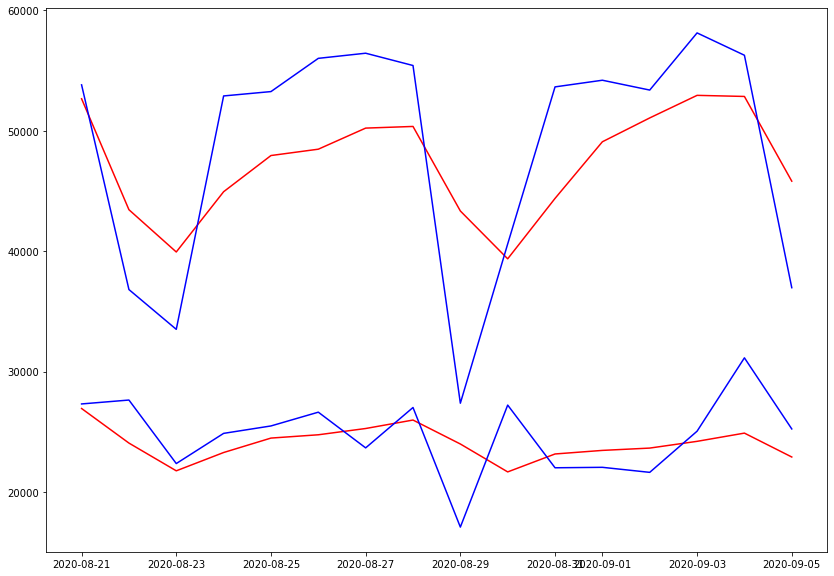

In [213]:
pred = results.predict(te_start,te_end, exog= exog_test)
plt.figure(figsize=(14,10))
plt.plot(pred, color='red')
plt.plot(_df_unstack[te_start:te_end][['Brooklyn Battery', 'Cross Bay']], color='blue')

In [214]:
for i in pred.columns:
    print('rmse value ', i, ' is', np.sqrt(mean_squared_error(pred[i],_df_unstack[te_start:te_end][i])))

rmse value  Brooklyn Battery  is 7027.3860345578105
rmse value  Cross Bay  is 3113.4057730365416


In [215]:
model_VARMAX = sm.tsa.VARMAX(_df_unstack[tr_start:tr_end][['Brooklyn Battery', 'Cross Bay']],
                             order=(3,1), trend = 'c',exog = exog_train, enforce_stationarity=False, enforce_invertibility=False)
results = model_VARMAX.fit()
results.summary()

C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Dep. Variable:,"['Brooklyn Battery', 'Cross Bay']",No. Observations:,963
Model:,"VARMAX(3,1)",Log Likelihood,-18717.524
,+ intercept,AIC,37569.047
Date:,"Wed, 16 Sep 2020",BIC,37895.341
Time:,18:09:55,HQIC,37693.289
Sample:,01-01-2018,,
,- 08-20-2020,,
Covariance Type:,opg,,
Ljung-Box (Q):,"265.84, 241.15",Jarque-Bera (JB):,"31339.41, 41925.68"
Prob(Q):,"0.00, 0.00",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"0.54, 0.71",Skew:,"1.44, 3.10"


C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


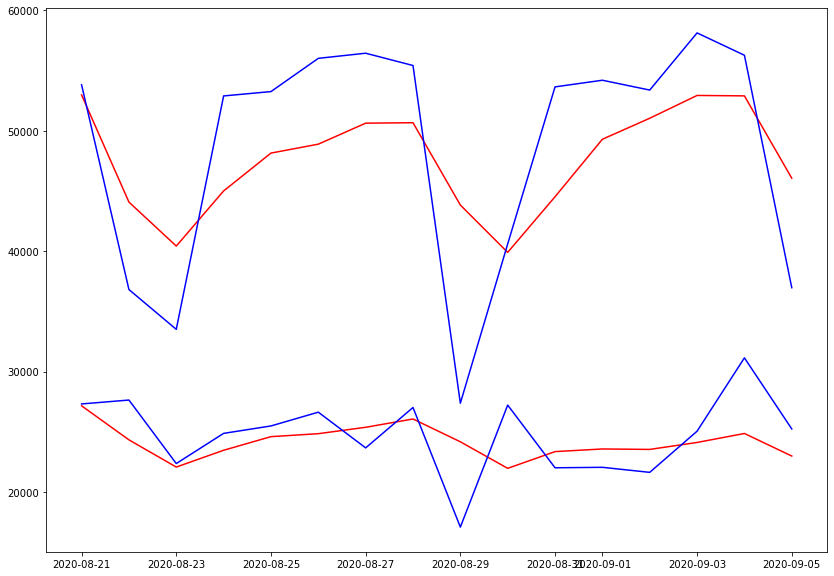

In [216]:
pred = results.predict(te_start,te_end, exog= exog_test)
plt.figure(figsize=(14,10))
plt.plot(pred, color='red')
plt.plot(_df_unstack[te_start:te_end][['Brooklyn Battery', 'Cross Bay']], color='blue')

In [217]:
for i in pred.columns:
    print('rmse value ', i, ' is', np.sqrt(mean_squared_error(pred[i],_df_unstack[te_start:te_end][i])))

rmse value  Brooklyn Battery  is 7081.133135599815
rmse value  Cross Bay  is 3080.5037251302947
